In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
cd ..

/home/suriya/dcu/Group-Project


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import seaborn as sns

In [4]:
cg = pd.read_csv('data/processed/cg.mean_chirp_sequence.train.csv')
cg

,fileid,distance,Rssi0,Rssi1,Rssi2,Rssi3,Rssi4,Rssi5,Rssi6,Rssi7,...,Rssi36,Rssi37,Rssi38,Rssi39,Rssi40,Rssi41,Rssi42,Rssi43,Rssi44,Rssi45
0,aaadbuvp_tc4tl20.csv,1.8,57.108571,59.551515,66.778481,54.696429,53.888060,68.899371,65.414966,59.243523,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,aafzrgzt_tc4tl20.csv,1.8,57.166667,56.482759,53.840000,57.208333,48.000000,57.531250,58.969697,58.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,aahiguvq_tc4tl20.csv,4.5,58.746269,60.834586,67.944056,65.708955,67.562092,61.825503,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,aajxgoxc_tc4tl20.csv,4.5,51.581250,55.675978,53.598592,55.210843,57.668605,52.848837,59.237805,61.412903,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,aaksdobg_tc4tl20.csv,1.8,57.514620,64.693750,61.047904,57.160494,64.921788,61.232143,67.146497,55.247312,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5121,zzmevjii_tc4tl20.csv,1.8,58.100457,75.516588,60.901961,77.383721,58.535294,64.183544,74.470297,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5122,zzmigogk_tc4tl20.csv,4.5,56.027586,55.228571,60.699115,56.668919,54.272059,53.224490,52.551724,51.022059,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5123,zzplqfsh_tc4tl20.csv,4.5,64.255639,61.352113,61.580952,67.437500,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5124,zztjapcz_tc4tl20.csv,4.5,65.241379,70.500000,64.457831,69.873418,68.468750,76.114583,67.666667,74.096386,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
rssi_cols = [ col for col in cg.columns if 'Rssi' in col ]
chirp_count = (cg[rssi_cols] > 0).sum(axis=1).values

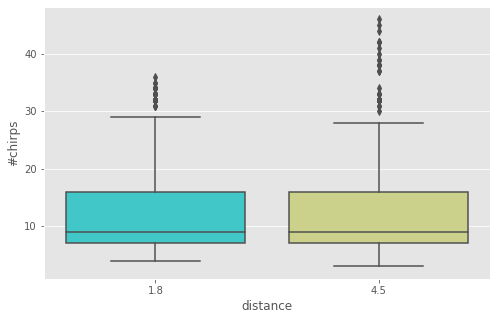

In [19]:
plt.figure(figsize=(8,5))
sns.boxplot(x=cg.distance, y=chirp_count, palette='rainbow')
plt.ylabel('#chirps');


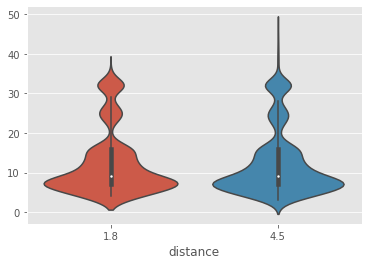

In [20]:
sns.violinplot(x=cg.distance, y=chirp_count);

## Rssi vs Distance

In [31]:
rssi_cols = [ col for col in cg.columns if 'Rssi' in col ]
mean_rssi = cg[rssi_cols].sum(axis=1) / chirp_count

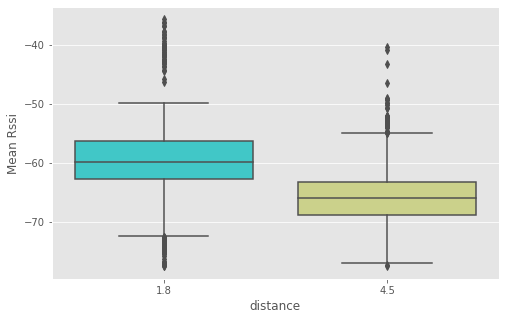

In [32]:
plt.figure(figsize=(8,5))
sns.boxplot(x=cg.distance, y=-mean_rssi, palette='rainbow')
plt.ylabel('Mean Rssi');


## Non-sensor Data

In [34]:
train_key = pd.read_csv('data/tc4tl_training_data_v1/tc4tl/docs/tc4tl_train_key.tsv', sep="\t")
train_key

,fileid,phone_carriage_state,distance_in_meters,step_size_in_sec,coarse_grain
0,aaadbuvp_tc4tl20.csv,pocket_hand,1.8,50,Y
1,aaamkcii_tc4tl20.csv,pocket_pocket,3.0,80,N
2,aabqtowt_tc4tl20.csv,hand_hand,1.2,60,N
3,aadkjwss_tc4tl20.csv,pocket_pocket,1.8,20,N
4,aafzrgzt_tc4tl20.csv,hand_hand,1.8,60,Y
...,...,...,...,...,...
15547,zzwcoemu_tc4tl20.csv,pocket_hand,1.2,80,N
15548,zzwoqxuc_tc4tl20.csv,hand_hand,4.5,70,N
15549,zzymwbbb_tc4tl20.csv,pocket_pocket,1.2,10,N
15550,zzzflikz_tc4tl20.csv,hand_hand,1.8,100,Y


In [39]:
from src.datapoint import read_non_sensor_data
from tqdm import tqdm
import os

In [42]:
train_data_dir = 'data/tc4tl_training_data_v1/tc4tl/data/train/'
non_sensor_data = []
for idx, row in tqdm(train_key.iterrows()):
    filedump = open(os.path.join(train_data_dir, row.fileid)).read()
    ns = read_non_sensor_data(filedump)
    ns.update({
        'fileid' : row.fileid,
        'distance' : row.distance_in_meters,
        'coarse_grain' : row.coarse_grain
    })
    non_sensor_data.append(ns)

non_sensor_data = pd.DataFrame(non_sensor_data)

15552it [00:04, 3214.28it/s]


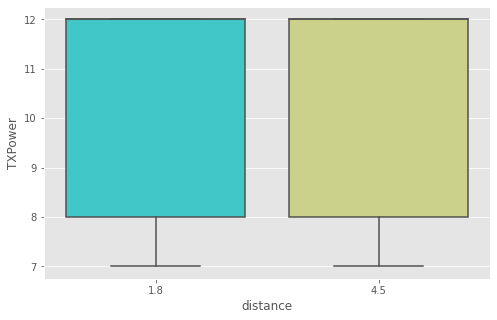

In [47]:
plt.figure(figsize=(8,5))
ns_cg = non_sensor_data[non_sensor_data.coarse_grain == 'Y']
sns.boxplot(x=ns_cg.distance, y=pd.to_numeric(ns_cg.TXPower), palette='rainbow')
plt.ylabel('TXPower');

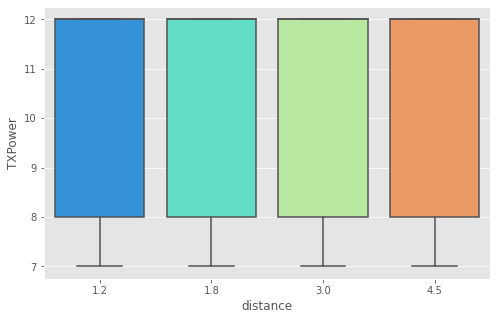

In [48]:
plt.figure(figsize=(8,5))
ns_fg = non_sensor_data[non_sensor_data.coarse_grain == 'N']
sns.boxplot(x=ns_fg.distance, y=pd.to_numeric(ns_fg.TXPower), palette='rainbow')
plt.ylabel('TXPower');

In [60]:
non_sensor_data.to_csv('data/processed/non-sensor_data.train.csv', index=False)
non_sensor_data

,TXDevice,TXPower,RXDevice,TXCarry,RXCarry,RXPose,TXPose,fileid,distance,coarse_grain
0,iPhoneX,12,iPhone8,pocket,hand,standing,standing,aaadbuvp_tc4tl20.csv,1.8,Y
1,iPhone11,8,iPhoneXS,pocket,pocket,standing,standing,aaamkcii_tc4tl20.csv,3.0,N
2,iPhone6Plus,12,iPhone11,hand,hand,standing,standing,aabqtowt_tc4tl20.csv,1.2,N
3,iPhone7,12,iPhone11,pocket,pocket,sitting,sitting,aadkjwss_tc4tl20.csv,1.8,N
4,iPhone6s,12,iPhone8,hand,hand,standing,sitting,aafzrgzt_tc4tl20.csv,1.8,Y
...,...,...,...,...,...,...,...,...,...,...
15547,iPhoneX,12,iPhone8,pocket,hand,standing,standing,zzwcoemu_tc4tl20.csv,1.2,N
15548,iPhone11_Pro_max,7,iPhone7,hand,hand,sitting,standing,zzwoqxuc_tc4tl20.csv,4.5,N
15549,iPhoneXs_max,8,iPhoneXs_max,pocket,pocket,standing,sitting,zzymwbbb_tc4tl20.csv,1.2,N
15550,iPhone11_Pro_max,7,iPhone7,hand,hand,sitting,standing,zzzflikz_tc4tl20.csv,1.8,Y


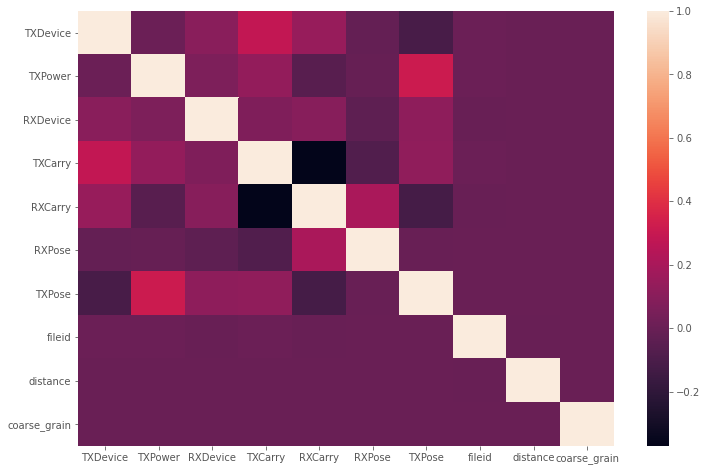

In [58]:
plt.figure(figsize=(12, 8))
sns.heatmap(non_sensor_data.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1));


In [59]:
mean_rssi

0       62.193619
1       55.723022
2       63.770244
3       58.128537
4       64.729368
          ...    
5121    67.013123
5122    61.061431
5123    63.656551
5124    69.552377
5125    64.026491
Length: 5126, dtype: float64

In [62]:
fg = pd.read_csv('data/processed/fg.mean_chirp_sequence.train.csv')
fg

,fileid,distance,Rssi0,Rssi1,Rssi2,Rssi3,Rssi4,Rssi5,Rssi6,Rssi7,...,Rssi15,Rssi16,Rssi17,Rssi18,Rssi19,Rssi20,Rssi21,Rssi22,Rssi23,Rssi24
0,aaamkcii_tc4tl20.csv,3.0,49.692308,59.250000,62.500000,57.631579,54.800000,0.000000,0.000000,0.000000,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,aabqtowt_tc4tl20.csv,1.2,52.284916,75.274194,55.357576,64.614035,62.836957,0.000000,0.000000,0.000000,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,aadkjwss_tc4tl20.csv,1.8,64.377246,62.309091,67.566667,62.543750,76.626582,62.582192,64.437500,69.129412,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,aagsvrpi_tc4tl20.csv,4.5,51.871795,58.312883,63.537143,56.343750,53.300000,57.576471,63.051948,0.000000,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,aajtgeuo_tc4tl20.csv,3.0,64.134831,67.742515,57.816092,69.408537,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10304,zztzsbtt_tc4tl20.csv,1.8,58.988372,58.568807,60.793814,55.989474,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10305,zzwcoemu_tc4tl20.csv,1.2,58.988095,66.542169,54.675159,72.627586,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10306,zzwoqxuc_tc4tl20.csv,4.5,72.814516,81.229299,71.387931,80.931818,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10307,zzymwbbb_tc4tl20.csv,1.2,71.535088,64.310345,61.985507,62.943548,73.379562,84.640000,80.556391,77.909091,...,79.59322,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [66]:
from sklearn.preprocessing import MinMaxScaler

scalar = MinMaxScaler()
scalar.fit([mean_rssi])

MinMaxScaler()

## Normalized RSSI

In [73]:
norm_rssi = scalar.fit_transform(-mean_rssi.values.reshape(-1, 1))


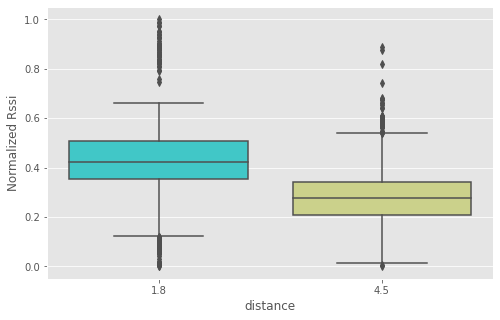

In [81]:
plt.figure(figsize=(8,5))
sns.boxplot(x=cg.distance, y=norm_rssi.reshape(-1), palette='rainbow')
plt.ylabel('Normalized Rssi');

## Normalized Path Loss Attenuation

In [96]:
ns_cg[ns_cg.fileid.isin(cg.fileid)]

,TXDevice,TXPower,RXDevice,TXCarry,RXCarry,RXPose,TXPose,fileid,distance,coarse_grain
0,iPhoneX,12,iPhone8,pocket,hand,standing,standing,aaadbuvp_tc4tl20.csv,1.8,Y
4,iPhone6s,12,iPhone8,hand,hand,standing,sitting,aafzrgzt_tc4tl20.csv,1.8,Y
6,iPhone7Plus,12,iPhone11,hand,hand,standing,standing,aahiguvq_tc4tl20.csv,4.5,Y
8,iPhone11,8,iPhone11,pocket,hand,standing,sitting,aajxgoxc_tc4tl20.csv,4.5,Y
11,iPhone7,12,iPhone11,pocket,pocket,sitting,sitting,aaksdobg_tc4tl20.csv,1.8,Y
...,...,...,...,...,...,...,...,...,...,...
15536,iPhone6,12,iPhone8,pocket,pocket,standing,standing,zzmevjii_tc4tl20.csv,1.8,Y
15537,iPhone8,12,iPhone8,hand,hand,standing,standing,zzmigogk_tc4tl20.csv,4.5,Y
15539,iPhone7,12,iPhone7,pocket,hand,standing,standing,zzplqfsh_tc4tl20.csv,4.5,Y
15545,iPhone5s,12,iPhoneXR,hand,pocket,standing,standing,zztjapcz_tc4tl20.csv,4.5,Y


In [102]:
_tx_power = ns_cg[ns_cg.fileid.isin(cg.fileid)].TXPower
_path_loss_attenuation = pd.to_numeric(_tx_power) - 41 - norm_rssi.reshape(-1)
norm_path_loss_attenuation = scalar.fit_transform(_path_loss_attenuation.values.reshape(-1, 1)).reshape(-1)

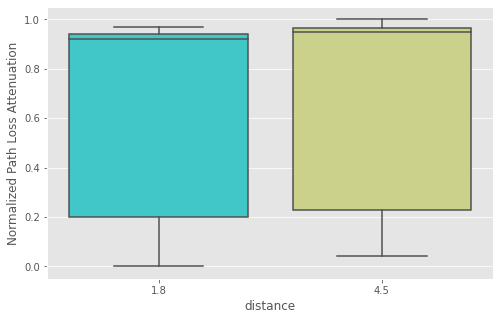

In [111]:
plt.figure(figsize=(8,5))
sns.boxplot(x=cg.distance, y=norm_path_loss_attenuation, palette='rainbow')
plt.ylabel('Normalized Path Loss Attenuation');

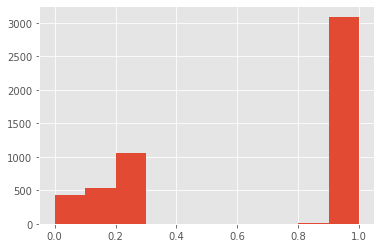

In [110]:
plt.hist(norm_path_loss_attenuation);